Generate a random network with 100 nodes and calculate the hitting time distribution:

In [1]:
import os
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf)
N = 100 #number of nodes
p = .4

In [2]:
# hitting time calculation function
def hitting_matrix(A_matrix):
    L = np.size(A_matrix,axis = 0)
    np.fill_diagonal(A_matrix, 0)

    D_matrix = np.zeros((L,L))
    D_inv = np.zeros((L,L))
    D_sqrt = np.zeros((L,L))
    D_sqrt_inv = np.zeros((L,L))
    for i in range(L):
        D_matrix[i,i] = np.sum(A_matrix[i])
        D_inv[i,i] = 1./D_matrix[i,i]
        D_sqrt[i,i] = np.sqrt(D_matrix[i,i])
        D_sqrt_inv[i,i] = 1./D_sqrt[i,i]

    p_matrix = np.dot(D_inv, A_matrix)
    eye_matrix = np.eye(L,L)
    eye_P = eye_matrix - p_matrix

    G_Lap = np.dot(D_sqrt,eye_P)
    G_Lap_n = np.dot(G_Lap, D_sqrt_inv)

    N_1 = np.dot(D_sqrt_inv,A_matrix)
    N_matrix = np.dot(N_1, D_sqrt_inv)
    lap_matrix = D_matrix - A_matrix
    [eig_val, eig_vec] = np.linalg.eigh(G_Lap_n)
    H = np.zeros((L,L))
    d = np.sum(D_matrix)
    for i in range(L):
        for j in range(L):
            deg_i = D_matrix[i,i]
            deg_j = D_matrix[j,j]
            for k in range(L):
                if eig_val[k] != min(eig_val):
                    t_i = (eig_vec[i,k]*eig_vec[i,k])/deg_i
                    t_j = (eig_vec[j,k]*eig_vec[j,k])/deg_j
                    t_ij = (eig_vec[i,k]*eig_vec[j,k])/np.sqrt(deg_i*deg_j)
                    H[i,j] = H[i,j] + d*(1./(eig_val[k]))*(t_j-t_ij)

    H = np.transpose(H)
    return H

In [3]:
def reshape_no_diag(input_matrix):
    L = np.size(input_matrix, axis = 0)
    H_vec = np.reshape(H, (1, L*L))
    for i in reversed(xrange(L)):
        H_vec = np.delete(H_vec, i*L+i)
    return H_vec

In [4]:
def show_graph(adjacency_matrix):
    import networkx as nx
    import matplotlib.pyplot as plt

    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw_networkx(gr, node_size=50)
    plt.show() 

In [5]:
#generate random network
def rand_network(N,p):
    A = np.zeros((N,N))
    for i in range(N):
        for j in range(i+1,N):
            rand_num = np.random.rand(1,1)
            if rand_num > p:
                A[i,j] = 1
                A[j,i] = 1
    np.fill_diagonal(A, 0)
    return A

In [6]:
n_bins = 50
for i in range(1,2):
    A = rand_network(N,p)
    H = hitting_matrix(A)
    H_vec = reshape_no_diag(H)
    [hist_avg, bins] = np.histogram(H_vec, bins = n_bins, range = [50, 150], normed = True)

In [8]:
N_iter = 20
for m in range(2,N_iter):
    A = rand_network(N,p)
    H = hitting_matrix(A)
    H_vec = reshape_no_diag(H)
    [hist, bins] = np.histogram(H_vec, bins = n_bins, range = [50, 150], normed = True)

    hist_avg = hist_avg + np.array(hist)
hist_avg = hist_avg/(N_iter-1)

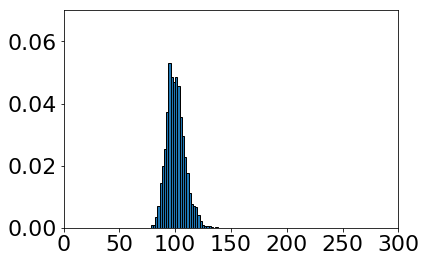

In [16]:
font = {'family': 'Arial',
        'size': 13,
        }
fig, ax = plt.subplots()

ax.bar(bins[:-1],hist_avg, width=np.diff(bins), ec="k", align="edge")
plt.yticks(np.arange(0, .07, step=0.02))

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(22)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22)

plt.axis([0, 300, 0, .07])
plt.show()

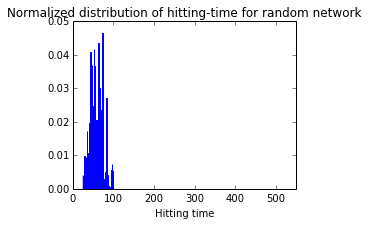

In [36]:
font = {'family': 'Arial',
        'size': 11,
        }
fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
n, bins, patches = ax.hist(H_vec_avg, 50, normed = 1, edgecolor='b')
ax.set_xlabel('Hitting time')
ax.set_title('Normalized distribution of hitting-time for random network')
plt.axis([0, 550, 0, .05])

plt.show()